In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

https://campus.datacamp.com/courses/extreme-gradient-boosting-with-xgboost/fine-tuning-your-xgboost-model?ex=1

### part 1. XGboost overall and classification

> ** 1. evaluation **
     - binary classification: ROC_AUC is the most popular metrics to evaluate model performance
     - multi-class classification: commonly to use accuracy to evaluate model performance
     
> ** 2. other supervised learning considerations  **
     - features can be either numeric or catergorical
     - numeric features should be scaled (Z-scored)
     - categorical features should be encoded(one-hot/dummy).
     
> ** 3. why XGboost **
     - Optimized gradient-boosting machine learning library
     - originally written in C++, now has APIs in several languages: python, R, scala, Java, etc.
     - speed and performance
     - core algorithm is parallelable
     - consistently outperforms other single algorithm

> ** 4. Decision tree **
     - Constructed iteratively (one decision at a time)
        - split is to segregate target value better, put each category is nearly one bucket
        - until a stopping criterion is met
        - low bias and high variance model- overfitting

> **5. When to use XGboost **
  - large training examples (datasize > 100, and feature < 100): as long as num_feature < num_data
  - xgboost tends to do well in a mix of categorical and numeric features, or only numeric

> ** 6. When NOT to use XGboost **
  - image recoginition
  - computer vision
  - NLP and understanding problems
  - deep learning fits examples above better
  - small sample size or num_feature > num_data

    

In [ ]:
import xgboost as xgb

url_link = 'https://assets.datacamp.com/production/repositories/943/datasets/4dbcaee889ef06fb0763e4a8652a4c1f268359b2/ames_housing_trimmed_processed.csv'
housing_data = pd.read_csv(url_link)
X, y = housing_data[housing_data.columns.tolist()[:-1]], housing_data[housing_data.columns.tolist()[-1]]
housing_data.head(2)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=123)


In [ ]:
# Import xgboost
import xgboost as xgb

# Create arrays for the features and the target: X, y
X, y = churn_data.iloc[:,:-1], churn_data.iloc[:,-1]

# Create the training and test sets
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=123)

# Instantiate the XGBClassifier: xg_cl
xg_cl = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=123)

# Fit the classifier to the training set
xg_cl.fit(X_train, y_train)

# Predict the labels of the test set: preds
preds = xg_cl.predict(X_test)

# Compute the accuracy: accuracy
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))


In [ ]:
"""
simple example using decision tree
"""
# Import the necessary modules
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Instantiate the classifier: dt_clf_4
dt_clf_4 = DecisionTreeClassifier(max_depth = 4)

# Fit the classifier to the training set
dt_clf_4.fit(X_train, y_train)

# Predict the labels of the test set: y_pred_4
y_pred_4 = dt_clf_4.predict(X_test)

# Compute the accuracy of the predictions: accuracy
accuracy = float(np.sum(y_pred_4==y_test))/y_test.shape[0]
print("accuracy:", accuracy)


> What is boosting
   - Meta algorithm: ensemble method to combine many weak learners to form a strong learner.

> Model evaluation through cross validation 

-example: Perform 3-fold cross-validation by calling xgb.cv(). dtrain is your churn_dmatrix, params is your parameter dictionary, folds is the number of cross-validation folds (3), num_boosting_rounds is the number of trees we want to build (5), metrics is the metric you want to compute (this will be "error", which we will convert to an accuracy).

In [ ]:
# Import xgboost
import xgboost as xgb

# Create arrays for the features and the target: X, y
X, y = churn_data.iloc[:,:-1], churn_data.iloc[:,-1]

# Create the DMatrix: churn_dmatrix
churn_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
# objective here is to choose loss function and booster can choose base learner
params = {"objective":"reg:logistic", "max_depth":3}

# Perform cross-validation: cv_results
# num_boosting_rounds is the number of trees we want to build
cv_results = xgb.cv(dtrain=churn_dmatrix, params=params, nfold=3,
                    num_boost_round=5, metrics="error", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Print the accuracy
print(((1-cv_results["test-error-mean"]).iloc[-1]))

In [ ]:
# compute another common metric used in binary classification - the area under the curve ("auc"). 
# Perform cross_validation: cv_results
cv_results = xgb.cv(dtrain=churn_dmatrix, params=params, nfold=3
                    , num_boost_round=5, metrics="auc", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)
# four columns: test-auc-mean  test-auc-std  train-auc-mean  train-auc-std

# Print the AUC
print((cv_results["test-auc-mean"]).iloc[-1])

## part 2. XGboost regression

> ** 1. regression basics **
     - common regression metrics: 
        - root mean square error (RMSE)
        - mean absolute error (MAE)
> ** 2. Objective (loss) functions and base learners **
     - loss functions and why we use them:
        - quantify how far off a prediction is from actual results
        - measures the difference between predicted and true data
        - goal: minimize loss function
     - common loss function in XGboost:
        - 'reg:linear': use for regression problems
        - 'reg:logistic': use for classification problems, when simply want prediction, not probability
        - 'binary:logistic': use for classification problems, when want probability rather than decision

> ** 3. base learners and why we need them **
     - XGboost creates a meta-model that is composed of many individual models to a final prediction
     - base learners = individual models
     - want base learners when combined finally is non-linear
     - each learner should be good at distinguishing or predicting different parts of the dataset
     - By default, XGBoost uses trees as base learners, so you don't have to specify that you want to use trees here with booster="gbtree". But if you want to use linear base learner, params = {"objective":"reg:linear", "booster":'gblinear'}
  


In [17]:
"""
use tree as base learners for regression
"""

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# Create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Instantiate the XGBRegressor: xg_reg
xg_reg = xgb.XGBRegressor(objective= "reg:linear", num_estimators = 10, random_state = 123)

# Fit the regressor to the training set
xg_reg.fit(X_train, y_train)

# Predict the labels of the test set: preds
preds = xg_reg.predict(X_test)

# Compute the rmse: rmse
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 22773.438540


- <font color='blue'>** use linear base learner to do xgb regression **</font>
- This model, although not as commonly used in XGBoost, allows you to create a regularized linear regression using XGBoost's powerful learning API. However, because it's uncommon, you have to use XGBoost's own non-scikit-learn compatible functions to build the model, such as xgb.train().

In [18]:
# Convert the training and testing sets into DMatrixes: DM_train, DM_test
DM_train = xgb.DMatrix(data=X_train, label=y_train)

DM_test =  xgb.DMatrix(data=X_test, label=y_test)

# Create the parameter dictionary: params
params = {"booster":"gblinear", "objective":"reg:linear"}

# Train the model: xg_reg
xg_reg = xgb.train(dtrain =DM_train, params = params, num_boost_round=5)

# Predict the labels of the test set: preds
preds = xg_reg.predict(DM_test)

# Compute and print the RMSE
rmse = np.sqrt(mean_squared_error(y_test,preds))
print("RMSE: %f" % (rmse))

RMSE: 44331.645061


In [ ]:
# evaluate model quality

In [13]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:linear", "max_depth":4}

# Perform cross-validation: cv_results
# can change metrics = 'rmse' to 'mae'
cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=4, num_boost_round=5, 
                    metrics='rmse', as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Extract and print final boosting round metric
print((cv_results["test-rmse-mean"]).tail(1))

[14:10:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[14:10:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[14:10:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[14:10:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[14:10:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[14:10:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[14:10:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[14:10:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[14:10:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_

     
> ** 4. Regularization in XGboost**
     - regularization in a control of model complexity: we want model accurate and as simple as possible
     - regularization paramters in XGboost by altering loss function:
        - gamma: minimize loss function allowed for a split to occur. higher gamma, fewer split.
        - alpha: l1 regularization on leaf weights(not on feature weights), larger values mean more regularized. high value leads many leaf weights to 0. 
        - lamda: l2 regularization on leaf weights. smooth decrease on leaf weights, instead of creating sparsity as l1.
        

> ** 5. Base learners in XGBoost** 
   - Linear base learner
      - Sum of linear terms
      - Boosted model is weighted  sum of linear models (thus itself linear)
      - Rarely used
   - Tree base learner:
      - Decision tree
      - Boosted model is weighted sum of decision trees (nonlinear)
      - Almost exclusively used in XGBoost

     
     
        
   

- example1:  to do l2 regularization penalty - also known as "lambda"

In [ ]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

reg_params = [1, 10, 100]

# Create the initial parameter dictionary for varying l2 strength: params
params = {"objective":"reg:linear","max_depth":3}

# Create an empty list for storing rmses as a function of l2 complexity
rmses_l2 = []

# Iterate over reg_params
for reg in reg_params:

    # Update l2 strength
    params["lambda"] = reg
    
    # Pass this updated param dictionary into cv
    cv_results_rmse = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=2, num_boost_round=5, metrics="rmse", as_pandas=True, seed=123)
    
    # Append best rmse (final round) to rmses_l2
    rmses_l2.append(cv_results_rmse["test-rmse-mean"].tail(1).values[0])

# Look at best rmse per l2 param
print("Best rmse as a function of l2:")
print(pd.DataFrame(list(zip(reg_params, rmses_l2)), columns=["l2", "rmse"]))

In [ ]:
- example 2: Visualizing individual XGBoost trees

In [8]:
url_link = 'https://assets.datacamp.com/production/repositories/943/datasets/4dbcaee889ef06fb0763e4a8652a4c1f268359b2/ames_housing_trimmed_processed.csv'
housing_data = pd.read_csv(url_link)
X, y = housing_data[housing_data.columns.tolist()[:-1]], housing_data[housing_data.columns.tolist()[-1]]
housing_data.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,Remodeled,GrLivArea,BsmtFullBath,BsmtHalfBath,...,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,PavedDrive_P,PavedDrive_Y,SalePrice
0,60,65.0,8450,7,5,2003,0,1710,1,0,...,0,0,0,0,1,0,0,0,1,208500
1,20,80.0,9600,6,8,1976,0,1262,0,1,...,0,1,0,0,0,0,0,0,1,181500


In [12]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:linear", "max_depth":2}

# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=housing_dmatrix, num_boost_round=10)

# Plot the first tree
xgb.plot_tree(xg_reg, num_trees =0 )
plt.show()

# Plot the fifth tree
xgb.plot_tree(xg_reg, num_trees =4 )
plt.show()

# Plot the last tree sideways
xgb.plot_tree(xg_reg, num_trees =9, rankdir = 'LR' )
plt.show()

- example 3: feature importance
    - One simple way of doing this involves counting the number of times each feature is split on across all boosting rounds (trees) in the model, and then visualizing the result as a bar graph, with the features ordered according to how many times they appear. 

[14:08:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[14:08:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[14:08:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[14:08:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[14:08:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[14:08:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[14:08:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[14:08:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[14:08:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_

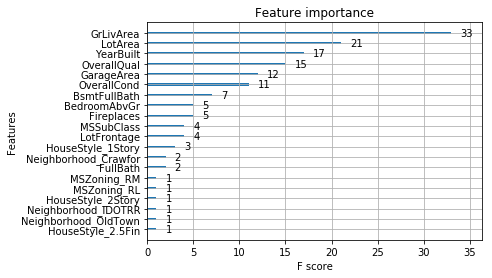

In [10]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data = X, label = y)

# Create the parameter dictionary: params
params = {'objective':'reg:linear', 'max_depth': 4}

# Train the model: xg_reg
xg_reg = xgb.train(dtrain = housing_dmatrix, num_boost_round= 10, params = params)

# Plot the feature importances
xgb.plot_importance(xg_reg)
plt.show()

## part 3. Fine-tuning XGBoost

- example 1. manual fine-tuning

In [ ]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data = X, label = y)

# Create the parameter dictionary for each tree: params 
params = {"objective":"reg:linear", "max_depth":3}

# Create list of number of boosting rounds
num_rounds = [5, 10, 15]

# Empty list to store final round rmse per XGBoost model
final_rmse_per_round = []

# Iterate over num_rounds and build one model per num_boost_round parameter
for curr_num_rounds in num_rounds:

    # Perform cross-validation: cv_results
    cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=3, num_boost_round=curr_num_rounds, metrics="rmse", as_pandas=True, seed=123)
    
    # Append final round RMSE
    final_rmse_per_round.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
num_rounds_rmses = list(zip(num_rounds, final_rmse_per_round))
print(pd.DataFrame(num_rounds_rmses,columns=["num_boosting_rounds","rmse"]))

** Automated boosting round selection using early_stopping **
  - Now, instead of attempting to cherry pick the best possible number of boosting rounds, you can very easily have XGBoost automatically select the number of boosting rounds for you within xgb.cv(). This is done using a technique called early stopping.
  - Early stopping works by testing the XGBoost model after every boosting round against a hold-out dataset and stopping the creation of additional boosting rounds (thereby finishing training of the model early) if the hold-out metric ("rmse" in our case) does not improve for a given number of rounds. Here you will use the early_stopping_rounds parameter in xgb.cv() with a large possible number of boosting rounds (50). Bear in mind that if the holdout metric continuously improves up through when num_boosting_rounds is reached, then early stopping does not occur.

- example 2. early stopping 
  -Perform 3-fold cross-validation with early stopping and "rmse" as your metric. Use 10 early stopping rounds and 50 boosting rounds. Specify a seed of 123 and make sure the output is a pandas DataFrame. 

In [ ]:
# Create your housing DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary for each tree: params
params = {"objective":"reg:linear", "max_depth":4}

# Perform cross-validation with early stopping: cv_results
cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=3,early_stopping_rounds= 10, num_boost_round= 50, seed = 123, as_pandas= True)

# Print cv_results
print(cv_results)

> ** Common tree tunable parameters **
  - learning rate(eta): how quickly the model fit the residual error using an additional base learner. 
        low learning rates, more rounds of learnings
  - regularization paramters:
        - gamma: minimize loss function allowed for a split to occur. higher gamma, fewer split.
        - alpha: l1 regularization on leaf weights(not on feature weights), larger values mean more regularized. high value leads many leaf weights to 0. 
        - lamda: l2 regularization on leaf weights. smooth decrease on leaf weights, instead of creating sparsity as l1.
  - max_depth: how deep each tree can be. max depth per tree.
  - subsample: % samples used per tree. low value can leads to underfitting, very high value might lead to overfitting.
  - colsample_bytree: % of features used per tree. small value here generally means providing additional regularization in each model. while larger value could end up with overfitting. the same as max_features in random forest
  
  
  
> ** linear tunable parameters **
  - lambda: l2 regularization
  - alpha: l1 regularization
  - lambda_bias: L2 reg terms on bias

- example tuning learning rate: eta
higher values of "eta" penalizing feature weights more strongly, causing much stronger regularization.

In [ ]:
# Create your housing DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary for each tree (boosting round)
params = {"objective":"reg:linear", "max_depth":3}

# Create list of eta values and empty list to store final round rmse per xgboost model
eta_vals = [0.001, 0.01, 0.1]
best_rmse = []

# Systematically vary the eta 
for curr_val in eta_vals:

    params["eta"] = curr_val
    
    # Perform cross-validation: cv_results
    cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=3, num_boost_round=10, early_stopping_rounds= 5,  metrics="rmse", as_pandas=True, seed=123)
    
    
    
    
    # Append the final round rmse to best_rmse
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
print(pd.DataFrame(list(zip(eta_vals, best_rmse)), columns=["eta","best_rmse"]))

In [ ]:
- tuning max_depth

In [ ]:
# Create your housing DMatrix
housing_dmatrix = xgb.DMatrix(data=X,label=y)

# Create the parameter dictionary
params = {"objective":"reg:linear"}

# Create list of max_depth values
max_depths = [2, 5, 10, 20]
# colsample_bytree_vals = [0.1, 0.5, 0.8,1]
best_rmse = []

# Systematically vary the max_depth
for curr_val in max_depths:

    params["max_depth"] = curr_val
    
#     params['colsample_bytree'] = curr_val
    
    # Perform cross-validation
    cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=2, num_boost_round=10, early_stopping_rounds= 5,  metrics="rmse", as_pandas=True, seed=123)
    
    
    
    
    
    # Append the final round rmse to best_rmse
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
print(pd.DataFrame(list(zip(max_depths, best_rmse)),columns=["max_depth","best_rmse"]))

> Review of GridSearch and RandomSearch
   - GridSearch: search exhausively over a given set of hyperparameters. 
   - RandomSearch: 
       - create a (possible infinite) range of hyperparameter values per hyperparameter that you would love to search over 
       - set the number of iterations that you like
       - randomly draw a value in the list in each hyperparamter and train/evaluate model using those hyperparameters.
       

> Limits of GridSearch and RandomSearch
    - GridSearch: can be time consuming when too many choices of hyperparamter combinations.
    - Random Search: parameter space to explore can be massive; randomly jumping throughout the space to look for 'best' result becomes a waiting game.


- example of xgb in gridsearch

In [ ]:
# Create your housing DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter grid: gbm_param_grid
gbm_param_grid = {
    'colsample_bytree': [0.3, 0.7],
    'n_estimators': [50],
    'max_depth': [2, 5]
}

# Instantiate the regressor: gbm
gbm = xgb.XGBRegressor()

# Perform grid search: grid_mse
grid_mse = GridSearchCV(estimator = gbm, param_grid= gbm_param_grid, scoring = 'neg_mean_squared_error', cv = 4, verbose = 1)


# Fit grid_mse to the data
grid_mse.fit(X, y)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", grid_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))

In [25]:
"""
RandomSearch in xgb
"""
# Create the parameter grid: gbm_param_grid 
gbm_param_grid = {
    'n_estimators': [25],
    'max_depth': range(2, 12)
}

# Instantiate the regressor: gbm
gbm = xgb.XGBRegressor(n_estimators=10)

# Perform random search: grid_mse
randomized_mse = RandomizedSearchCV(estimator = gbm, param_distributions= gbm_param_grid, scoring = 'neg_mean_squared_error', n_iter = 5, cv = 4, verbose = 1)


# Fit randomized_mse to the data
randomized_mse.fit(X, y)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", randomized_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(randomized_mse.best_score_)))

In [ ]:
> pipeline

In [47]:
url = 'https://assets.datacamp.com/production/course_6611/datasets/ames_unprocessed_data.csv'
df = pd.read_csv(url)
df.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,...,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageArea,PavedDrive,SalePrice
0,60,RL,65.0,8450,CollgCr,1Fam,2Story,7,5,2003,...,1710,1,0,2,1,3,0,548,Y,208500
1,20,RL,80.0,9600,Veenker,1Fam,1Story,6,8,1976,...,1262,0,1,2,0,3,1,460,Y,181500


- Encoding categorical columns I: LabelEncoder

In [40]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Fill missing values with 0
df.LotFrontage = df.LotFrontage.fillna(0)

# Create a boolean mask for categorical columns
categorical_mask = (df.dtypes == object)

# Get list of categorical column names
categorical_columns = df.columns[categorical_mask].tolist()

# Print the head of the categorical columns
print(df[categorical_columns].head())

# Create LabelEncoder object: le
le = LabelEncoder()

# Apply LabelEncoder to categorical columns
df[categorical_columns] = df[categorical_columns].apply(lambda x: le.fit_transform(x))

# Print the head of the LabelEncoded categorical columns
print(df[categorical_columns].head())

  MSZoning Neighborhood BldgType HouseStyle PavedDrive
0       RL      CollgCr     1Fam     2Story          Y
1       RL      Veenker     1Fam     1Story          Y
2       RL      CollgCr     1Fam     2Story          Y
3       RL      Crawfor     1Fam     2Story          Y
4       RL      NoRidge     1Fam     2Story          Y
   MSZoning  Neighborhood  BldgType  HouseStyle  PavedDrive
0         3             5         0           5           2
1         3            24         0           2           2
2         3             5         0           5           2
3         3             6         0           5           2
4         3            15         0           5           2


- Encoding categorical columns II: OneHotEncoder
    - labelencoder: allowing the model to assume this natural ordering may result in poor performance.

In [42]:
# Import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

# Create OneHotEncoder: ohe
ohe = OneHotEncoder(categorical_features = categorical_mask, sparse = False)

# Apply OneHotEncoder to categorical columns - output is no longer a dataframe: df_encoded
df_encoded = ohe.fit_transform(df)

# Print first 5 rows of the resulting dataset - again, this will no longer be a pandas dataframe
# print(df_encoded[:5, :])

# Print the shape of the original DataFrame
print(df.shape)

# Print the shape of the transformed array
print(df_encoded.shape)

(1460, 21)
(1460, 62)


- ** DictVectorizer**: Using a DictVectorizer on a DataFrame that has been converted to a dictionary allows you to get label encoding as well as one-hot encoding in one go.

DictVectorizer has useful attributes such as vocabulary_ which maps the names of the features to their indices. 

In [64]:
url = 'https://assets.datacamp.com/production/course_6611/datasets/ames_unprocessed_data.csv'
df = pd.read_csv(url)
# Create arrays for the features and the target: X, y
X, y = df.iloc[:,:-1], df.iloc[:,-1]

df.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,...,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageArea,PavedDrive,SalePrice
0,60,RL,65.0,8450,CollgCr,1Fam,2Story,7,5,2003,...,1710,1,0,2,1,3,0,548,Y,208500
1,20,RL,80.0,9600,Veenker,1Fam,1Story,6,8,1976,...,1262,0,1,2,0,3,1,460,Y,181500


In [63]:
# Import DictVectorizer
from sklearn.feature_extraction import DictVectorizer

# Convert df into a dictionary: df_dict
df_dict = df.to_dict(orient = 'records')

# Create the DictVectorizer object: dv
dv = DictVectorizer(sparse = False)

# Apply dv on df: df_encoded
df_encoded = dv.fit_transform(df_dict)

# Print the resulting first five rows
print(df_encoded[:1,:])

# Print the vocabulary
print(dv.vocabulary_)

[[3.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00
  0.000e+00 0.000e+00 2.000e+00 5.480e+02 1.710e+03 1.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00
  8.450e+03 6.500e+01 6.000e+01 0.000e+00 0.000e+00 0.000e+00 1.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 5.000e+00 7.000e+00
  0.000e+00 0.000e+00 1.000e+00 0.000e+00 2.085e+05 2.003e+03]]
{'Neighborhood=NridgHt': 45, 'BsmtFullBath': 6, 'Neighborhood=Timber': 52, 'HalfBath': 12, 'HouseStyle=2.5Fin': 16, 'MSZoning=FV': 25, 'OverallCond': 54, 'LotArea': 21, 'Neighborhood=Sawyer': 48, 'Neighborhood=CollgCr': 34, 'HouseStyle=SFoyer': 19, 'GrLivArea': 11, 'HouseStyle=1.5Unf': 14, 'BldgType=Twnhs': 4, 'MSZoning=RM': 28, 'BldgType=TwnhsE': 5, 'Firepl

In [66]:
# Import necessary modules
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline

# Fill LotFrontage missing values with 0
X.LotFrontage = X.LotFrontage.fillna(0)

# Setup the pipeline steps: steps
steps = [("ohe_onestep", DictVectorizer(sparse=False)),
         ("xgb_model", xgb.XGBRegressor())]

# Create the pipeline: xgb_pipeline
xgb_pipeline = Pipeline(steps)

# Fit the pipeline
xgb_pipeline.fit(X.to_dict("records"), y)

Pipeline(memory=None,
     steps=[('ohe_onestep', DictVectorizer(dtype=<type 'numpy.float64'>, separator='=', sort=True,
        sparse=False)), ('xgb_model', XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_chi...
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1))])

### final: Using XGBoost in pipelines



In [70]:
# Import necessary modules
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# Fill LotFrontage missing values with 0
X.LotFrontage = X.LotFrontage.fillna(0)

# Setup the pipeline steps: steps
steps = [("ohe_onestep", DictVectorizer(sparse=False)),
         ("xgb_model", xgb.XGBRegressor(max_depth=2, objective="reg:linear"))]

# Create the pipeline: xgb_pipeline
xgb_pipeline = Pipeline(steps)

# Cross-validate the model
cross_val_scores = cross_val_score(xgb_pipeline, X.to_dict('records'),y, scoring = 'neg_mean_squared_error', cv = 10)

# Print the 10-fold RMSE
print("10-fold RMSE: ", np.mean(np.sqrt(np.abs(cross_val_scores))))

('10-fold RMSE: ', 29867.603720688923)


In [ ]:
# Create the parameter grid
gbm_param_grid = {
    'clf__learning_rate': np.arange(0.05, 1, 0.05),
    'clf__max_depth': np.arange(3, 10, 1),
    'clf__n_estimators': np.arange(50, 200, 50)
}

# Perform RandomizedSearchCV
randomized_roc_auc = RandomizedSearchCV(pipeline, param_distributions= gbm_param_grid, scoring = 'roc_auc', verbose = 1, n_iter = 2)

# Fit the estimator
randomized_roc_auc.fit(X,y)

# Compute metrics
print(randomized_roc_auc.best_score_)
print(randomized_roc_auc.best_estimator_)

### case study: kidney disease
   - The chronic kidney disease dataset contains both categorical and numeric features, but contains lots of missing values. The goal here is to predict who has chronic kidney disease given various blood indicators as features.

In [75]:
# url_kidney = 'https://assets.datacamp.com/production/course_6611/datasets/chronic_kidney_disease.csv'
data = pd.read_csv('kidney_disease.csv')
# Create arrays for the features and the target: X, y
X, y = data.iloc[:,:-1], data.iloc[:,-1]

data.head(2)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.02,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd


impute missing categorical values directly using the Categorical_Imputer() class in sklearn_pandas, and the DataFrameMapper() class to apply any arbitrary sklearn-compatible transformer on DataFrame columns, where the resulting output can be either a NumPy array or DataFrame.

In [80]:
# Import necessary modules
from sklearn_pandas import DataFrameMapper
from sklearn_pandas import CategoricalImputer
from sklearn.preprocessing import Imputer

# Check number of nulls in each feature column
nulls_per_column = X.isnull().sum()
# print(nulls_per_column)

# Create a boolean mask for categorical columns
categorical_feature_mask = X.dtypes == object

# Get list of categorical column names
categorical_columns = X.columns[categorical_feature_mask].tolist()

# Get list of non-categorical column names
non_categorical_columns = X.columns[~categorical_feature_mask].tolist()

# Apply numeric imputer
numeric_imputation_mapper = DataFrameMapper(
                                            [([numeric_feature], Imputer(strategy="median")) for numeric_feature in non_categorical_columns],
                                            input_df=True,
                                            df_out=True
                                           )

# Apply categorical imputer
categorical_imputation_mapper = DataFrameMapper(
                                                [(category_feature, CategoricalImputer()) for category_feature in categorical_columns],
                                                input_df=True,
                                                df_out=True
                                               )


- scikit-learn's FeatureUnion to concatenate their results, which are contained in two separate transformer objects - numeric_imputation_mapper, and categorical_imputation_mapper, respectively.

In [81]:


# Import FeatureUnion
from sklearn.pipeline import FeatureUnion

# Combine the numeric and categorical transformations
numeric_categorical_union = FeatureUnion([
                                          ("num_mapper", numeric_imputation_mapper),
                                          ("cat_mapper", categorical_imputation_mapper)
                                         ])

In [ ]:
It's time to piece together all of the transforms along with an XGBClassifier to build the full pipeline!

Besides the numeric_categorical_union that you created in the previous exercise, there are two other transforms needed: the Dictifier() transform which we created for you, and the DictVectorizer().

In [ ]:
# Create full pipeline

"""
("dictifier", Dictifier()) is a personal function
X = X.to_dict('records')
"""
pipeline = Pipeline([
                     ("featureunion", numeric_categorical_union),
                     ("dictifier", Dictifier()),
                     ("vectorizer", DictVectorizer(sort=False)),
                     ("clf", xgb.XGBClassifier(max_depth=3))
                    ])

# Perform cross-validation
cross_val_scores = cross_val_score(pipeline, kidney_data, y, scoring="roc_auc", cv=3)

# Print avg. AUC
print("3-fold AUC: ", np.mean(cross_val_scores))

In [ ]:
# Create the parameter grid
gbm_param_grid = {
    'clf__learning_rate': np.arange(0.05, 1, 0.05),
    'clf__max_depth': np.arange(3, 10, 1),
    'clf__n_estimators': np.arange(50, 200, 50)
}

# Perform RandomizedSearchCV
randomized_roc_auc = RandomizedSearchCV(pipeline, param_distributions= gbm_param_grid, scoring = 'roc_auc', verbose = 1, n_iter = 2)

# Fit the estimator
randomized_roc_auc.fit(X,y)

# Compute metrics
print(randomized_roc_auc.best_score_)
print(randomized_roc_auc.best_estimator_)

In [89]:
%%html
### not covered
<img src = 'not_covered.png', width = 400, height = 500>

- debug and understand DictVectorizer

In [68]:
# Import DictVectorizer
from sklearn.feature_extraction import DictVectorizer

# Convert df into a dictionary: df_dict
df_dict = df.to_dict(orient = 'records')
df_dict[:1]

[{'BedroomAbvGr': 3,
  'BldgType': '1Fam',
  'BsmtFullBath': 1,
  'BsmtHalfBath': 0,
  'Fireplaces': 0,
  'FullBath': 2,
  'GarageArea': 548,
  'GrLivArea': 1710,
  'HalfBath': 1,
  'HouseStyle': '2Story',
  'LotArea': 8450,
  'LotFrontage': 65.0,
  'MSSubClass': 60,
  'MSZoning': 'RL',
  'Neighborhood': 'CollgCr',
  'OverallCond': 5,
  'OverallQual': 7,
  'PavedDrive': 'Y',
  'Remodeled': 0,
  'SalePrice': 208500,
  'YearBuilt': 2003}]

In [69]:
df.BldgType.unique()

array(['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'], dtype=object)

In [37]:
a = pd.DataFrame(
        {'col1': [1, 2], 'col2': [0.5, 0.75]}, index=['a', 'b'])
a

,col1,col2
a,1,0.50
b,2,0.75


In [38]:
a.to_dict(orient = 'records')

[{'col1': 1.0, 'col2': 0.5}, {'col1': 2.0, 'col2': 0.75}]

In [86]:
np.range()

array([4.])

In [88]:
np.arange(0.05, 1, 0.05)

array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])